<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#ODE">ODE</a></li>
<ol><li><a class="" href="#Taylor-Series">Taylor Series</a></li>
<ol><li><a class="" href="#Example">Example</a></li>
</ol><li><a class="" href="#Picard-Method">Picard Method</a></li>
<ol>
<li><a class="" href="#Implementation">Implementation</a></li>
</ol><li><a class="" href="#Euler-Method">Euler Method</a></li>
<ol><li><a class="" href="#Euler's-Modified-Method">Euler's Modified Method</a></li>
</ol><li><a class="" href="#Runge-Kutta-Method">Runge-Kutta Method</a></li>
<ol><li><a class="" href="#Second-Order-Runge-Kutta-Method">Second Order Runge-Kutta Method</a></li>
<ol><li><a class="" href="#Heun-Method">Heun Method</a></li>
<li><a class="" href="#Midpoint-Method">Midpoint Method</a></li>
<li><a class="" href="#Ralston's-Method">Ralston's Method</a></li>
<li><a class="" href="#Implementations">Implementations</a></li>

</ol><li><a class="" href="#Third-Order-Runge-Kutta-Method">Third Order Runge-Kutta Method</a></li>
<li><a class="" href="#Fourth-Order-Runge-Kutta-Method">Fourth Order Runge-Kutta Method</a></li>
<ol><li><a class="" href="#Implementation">Implementation</a></li>

</ol><li><a class="" href="#Fifth-Order-Runge-Kutta-Method-(Buther's-Method)">Fifth Order Runge-Kutta Method (Buther's Method)</a></li>
</ol>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ODE

## Taylor Series

Taylor series are expansions of a function $f(x)$ by some finite distance $dx$ to $f(x+dx)$.
* In essence, the Taylor series provides a means to predict a function value at one point
in terms of the function value and its derivatives at another point.
* In particular, the theorem states that any smooth function can be approximated as a
polynomial:
$$
f(x_{i+1}) = f(x_i)+f^{'}(x_i)h + f^{''}(x_i)\frac{h^2}{2!} + \ldots + f^{n}(x_i)\frac{h^n}{n!}
$$

We can use this to get the value of a function at a given given point given a deffirential equation.

### Example

Let the ODE be:
$$
\frac{dy}{dx} = f(x,y) = x - y
$$
Given initial conditions $y(0) = 1$ find $y(0.1)$ using the Taylor series expansion.

The general solution of the above DE is
$$
y{\left(x \right)} = x - 1 + 2 e^{- x}$$

In [2]:
def f(x,y):
    return x-y

def sol(x):
    return x-1+2*np.exp(-x)

In [3]:
sol(0.1)

0.909674836071919

In [4]:
def error(x, y_calc):
    y_true = sol(x)
    ae = np.abs(y_true-y_calc)
    re = np.abs(y_true-y_calc)/np.abs(y_true)
    print(f"Absolute error: {ae}")
    print(f"Relative error: {re}")

## Picard Method

The aim is to solve the ODE using the integration. Given:
$$
\frac{dy}{dx} = f(x,y)
$$
and boundary conditions $y(x_0) = y_0$ we have to find the value of $y(x)$. In Picard method, this is done by:
$$
y^{(1)} = y_0 + \int_{x_0}^x f(x,y_0)dx\\
y^{(2)} = y^{(1)} + \int_{x_0}^x f(x,y^{(1)})dx\\
y^{(3)} = y^{(2)} + \int_{x_0}^x f(x,y^{(2)})dx\\
\vdots\\
$$


### Implementation

In [5]:
#Integration using Simpsons 1/3 rule
def integrate(f, a, b, y=0, n=1000):
    h = (b-a)/n
    sum = 0
    sum+=f(a, y)
    sum+=f(b, y)
    for i in range(1, n, 2):
        sum += 4*f(a+i*h, y)
    for i in range(2, n, 2):
        sum += 2*f(a+i*h, y)
    y_true = sum*h/3
    return y_true

In [6]:
def picard(f, x0, y0, x, n, report_error=True):
    y_prev = y0
    for i in range(n):
        y_prev = y_prev + integrate(f=f, a=x0, b=x, y=y_prev)

    if report_error:
        error(x, y_prev)
    return y_prev

In [7]:
integrate(f, 0, 1, 0.1)

0.39999999999999986

In [8]:
picard(f, 0, 1, 0.1, 10)

Absolute error: 0.5284303179769191
Relative error: 0.5809002261277691


0.38124451809499993

## Euler Method

Also known as *First Order Runge-Kutta Method*, the Euler method is a numerical method for solving a differential equation using stepwise approximation. The formula is:
$$
y_{n+1} = y_n + hf(x_n,y_n)
$$

### Implementation

In [9]:
def euler(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        y_prev = y_prev + f(x0+i*h, y_prev)*h
    if report_error:
        error(x, y_prev)
    return y_prev

In [10]:
euler(f, 0, 1, 0.1, 10)

Absolute error: 0.0009106860543101059
Relative error: 0.0010011116260427225


0.9087641500176089

### Euler's Modified Method

Here, we use a two steo predictor corrector approximation.
$$
y_{n+1}^* = y_n + hf(x_n,y_n)\\
y_{n+1} = y_n + \frac{h}{2}\left[f(x_n,y_n)+f(x_n+h,y_{n+1}^*)\right]
$$

In [11]:
def euler_modified(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
       y_next = y_prev + h*f(x0+i*h, y_prev)
       y_prev = y_prev + h*(f(x0+i*h, y_prev)+f(x0+(i+1)*h, y_next))/2
    if report_error:
        error(x, y_prev)
    return y_prev

In [12]:
euler_modified(f, 0, 1, 0.1, 10)

Absolute error: 3.0388386941249124e-06
Relative error: 3.3405768452900914e-06


0.9096778749106131

So, Euler's modified method is far more accurate than the Euler method.

## Runge-Kutta Method

In the Runge-Kutta method, the next value of y is calculated using an increment function $\phi$. We get:
$$
y_{n+1} = y_n + \phi(x_i,y_i, h)\times h\\
\phi = a_1k_1 + a_2k_2 + a_3k_3 + \cdots + a_nk_n
$$
k's are called the increment slope factor and are given by:
$$
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+p_1h,y_i+q_{11}k_1h)\\
k_3 = f(x_i+p_2h,y_i+q_{21}k_1h+q_{22}k_2h)\\
\vdots\\
k_n = f(x_i+p_{n-1}h,y_i+q_{n-1,1}k_1h+q_{n-1,2}k_2h+\cdots+q_{n-1,n-1}k_{n-1}h)
$$

### Second Order Runge-Kutta Method

The second order R-K method is:
$$
y_{i+1} = y_i + (a_1k_1+a_2k_2)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+p_1h,y_i+q_{11}k_1h)
$$
Where the constants are related by:
$$
a_1 + a_2 = 1\\
a_2p_1 = \frac{1}{2}\\
a_2q_{11} = \frac{1}{2}
$$

#### Heun Method

Using $a_2 = 1/2$ gives the Heun method. The constants becomes:
$$
a_1 =a_2= 1/2\\
p_1 = q_{11} = 1
$$
And hence, we get:
$$
y_{i+1} = y_i + (\frac{1}{2}k_1+\frac{1}{2}a_2k_2)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+h,y_i+k_1h)
$$

#### Midpoint Method

Here, we use $a_2=1$ and hence the R-K equation becomes:
$$
y_{i+1} = y_i + k_2h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+h/2,y_i+k_1h/2)
$$

#### Ralston's Method

Here, we use $a_2=2/3$ and hence the R-K equation becomes:
$$
y_{i+1} = y_i + (\frac{1}{3}k_1+\frac{2}{3}a_2k_2)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+\frac{3}{4}h,y_i+\frac{3}{4}k_1h)
$$

#### Implementations

In [13]:
#Heun method
def heun(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+1)*h, y_prev+h*k1)
        y_prev = y_prev + (k1+k2)*h/2
    if report_error:
        error(x, y_prev)
    return y_prev

In [14]:
heun(f, 0, 1, 0.1, 10)

Absolute error: 3.0388386941249124e-06
Relative error: 3.3405768452900914e-06


0.9096778749106131

In [15]:
# Midpoint method
def midpoint(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        y_prev = y_prev + k2*h
    if report_error:
        error(x, y_prev)
    return y_prev

In [16]:
midpoint(f, 0, 1, 0.1, 10)

Absolute error: 3.0388386941249124e-06
Relative error: 3.3405768452900914e-06


0.9096778749106131

In [17]:
# Ralston method
def ralston(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+0.75)*h, y_prev+h*k1*0.75)
        y_prev = y_prev + (k1+2*k2)*h/3
    if report_error:
        error(x, y_prev)
    return y_prev

In [18]:
ralston(f, 0, 1, 0.1, 10)

Absolute error: 3.0388386941249124e-06
Relative error: 3.3405768452900914e-06


0.9096778749106131

### Third Order Runge-Kutta Method

Here, we use:
$$
y_{i+1} = y_i + \frac{1}{6}(k_1+4k_2+k_3)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1h)\\
k_3 = f(x_i+h,y_i-k_1h+2k_2h)
$$

#### Implementations

In [19]:
def rk3(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = f(x0+(i+1)*h, y_prev-h*k1+2*k2*h)
        y_prev = y_prev + (k1+4*k2+k3)*h/6
    if report_error:
        error(x, y_prev)
    return y_prev

In [20]:
rk3(f, 0, 1, 0.1, 10)

Absolute error: 7.600886253733563e-09
Relative error: 8.355607907716859e-09


0.9096748284710328

### Fourth Order Runge-Kutta Method

Here, we use:
$$
y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+\frac{1}{2}h,y_i+\frac{1}{2}k_1h)\\
k_3 = f(x_i+\frac{1}{2}h,y_i+\frac{1}{2}k_2h)\\
k_4 = f(x_i+h,y_i+k_3h)
$$

#### Implementation

In [21]:
def rk4(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = f(x0+(i+0.5)*h, y_prev+h*k2*0.5)
        k4 = f(x0+(i+1)*h, y_prev+h*k3)
        y_prev = y_prev + (k1+2*k2+2*k3+k4)*h/6
    if report_error:
        error(x, y_prev)
    return y_prev

In [22]:
rk4(f, 0, 1, 0.1, 10)

Absolute error: 1.5207057835198157e-11
Relative error: 1.6717025943977946e-11


0.9096748360871261

### Fifth Order Runge-Kutta Method (Buther's Method)

Here, we use:
$$
y_{i+1} = y_i + \frac{1}{90}(7k_1+23k_3+12k_4+32k_5+7k_6)h\\
k_1 = f(x_i,y_i)\\
k_2 = f(x_i+\frac{1}{4}h,y_i+\frac{1}{4}k_1h)\\
k_3 = f(x_i+\frac{1}{4}h,y_i+\frac{1}{8}(k_1+k_2)h)\\
k_4 = f(x_i+\frac{1}{2}h,y_i+(\frac{-k_2}{2}+k_3)h)\\
k_5 = f(x_i+\frac{3}{4}h,y_i+\frac{3}{16}(k_1+3k_4)h)\\
k_6 = f(x_i+h,y_i+\frac{1}{7}(-3k_1+2k_2+12k_3-12k_4+8k_5)h)
$$

#### Implementation

In [23]:
def rk5(f, x0, y0, x, n, report_error=True):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = f(x0+i*h, y_prev)
        k2 = f(x0+(i+0.25)*h, y_prev+h*k1*0.25)
        k3 = f(x0+(i+0.25)*h, y_prev+(k1+k2)*h/8)
        k4 = f(x0+(i+0.5)*h, y_prev+(-0.5*k2+k3)*h)
        k5 = f(x0+(i+0.75)*h, y_prev+3*(k1+3*k4)*h/16)
        k6 = f(x0+(i+1)*h, y_prev+(-3*k1+2*k2+12*k3-12*k4+8*k5)*h/7)
        y_prev = y_prev + (7*k1+32*k3+12*k4+32*k5+7*k6)*h/90
    if report_error:
        error(x, y_prev)
    return y_prev

In [24]:
rk5(f, 0, 1, 0.1, 10)

Absolute error: 3.3306690738754696e-15
Relative error: 3.661384202137198e-15


0.9096748360719223

### Generalized Runge-Kutta Method

We want to solve a system of differential equations using the Runge-Kutta method. Consider if you had m first-order ODE's (after appropriate decomposition). The system looks like:
$$\begin{align*}
\frac{d y_1}{d x} &= f_1(x, y_1, \ldots, y_m) \\
\frac{d y_2}{d x} &= f_2(x, y_1, \ldots, y_m) \\
&\,\,\,\vdots\\
\frac{d y_m}{d x} &= f_m(x, y_1, \ldots, y_m) \\
\end{align*}
$$

Let's define
$$
\vec{Y} = (y_1, \ldots, y_m)\\
\text{and}\\
\vec{f} = (f_1, \ldots, f_m)
$$
Using this, the system of linear equation takes form:
$$
\frac{d}{dx} \vec{Y} = \vec{f}(x,\vec{Y})$$
Now we can generalize the RK method by defining
$$
\begin{align*}
\vec{k}_1 &= h\vec{f}\left(x_n,\vec{Y}(x_n)\right)\\
\vec{k}_2 &= h\vec{f}\left(x_n + \tfrac{1}{2}h,\vec{Y}(x_n) + \tfrac{1}{2}\vec{k}_1\right)\\
\vec{k}_3 &= h\vec{f}\left(x_n + \tfrac{1}{2}h,\vec{Y}(x_n) + \tfrac{1}{2}\vec{k}_2\right)\\
\vec{k}_4 &= h\vec{f}\left(x_n + h, \vec{Y}(x_n) + \vec{k}_3\right)\\
\vec{Y}(x_{n+1}) &= \vec{Y}(x_n) + \tfrac{1}{6}\left(\vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4\right)
\end{align*}$$

If we define the initial conditions as an array, the implementation of this can simply be done by using arrays.

#### Example 1

Let's solve the ODE
$$
\frac{d^2y}{dx^2} + \frac{dy}{dx} -6y = 0
$$
defining $u_1 = y$ and $u_2 = \frac{dy}{dx}$ gives:
$$
\left\{\begin{array}{l}
  \frac{du_1}{dx} = u_2 \\
  \frac{du_2}{dx} = 6u_1 - u_2
\end{array}\right.
$$
The solution of this can be done as:

In [25]:
f2 = lambda x, u1, u2: 6*u1-u2
f1 = lambda x, u1, u2: u2

def F(x, Y):
    sol = [f1(x, Y[0], Y[1]), f2(x, Y[0], Y[1])]
    return np.array(sol)

In [26]:
y0 = np.array([3, 1])
x0 = np.array([0, 0])

In [27]:
def rk4_general(F, x, x0, y0, n):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = F(x0+i*h, y_prev)
        k2 = F(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = F(x0+(i+0.5)*h, y_prev+h*k2*0.5)
        k4 = F(x0+(i+1)*h, y_prev+h*k3)
        y_prev = y_prev + (k1+2*k2+2*k3+k4)*h/6
    return y_prev

In [28]:
x = 1
n = 10
rk4_general(F, x, x0, y0, n)

array([14.82757851, 29.40615689])

In [29]:
xs = np.linspace(0, 1, 100)
ys = np.zeros((2, 100))
for i in range(100):
    ys[:, i] = rk4_general(F, xs[i], x0, y0, n)

In [30]:
plt.rcdefaults()

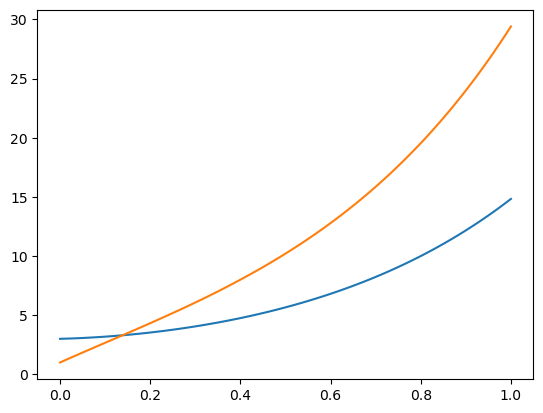

In [31]:
plt.plot(xs, ys[0], label='u1')
plt.plot(xs, ys[1], label='u2')

#### Example 2

The ODE governing the motion of a particle in a harmonic oscillator is given by
$$
\frac{d^2x}{dt^2} = -\omega^2 x
$$
With initial conditions $x(0) = 0$ and $\dot{x}(0) = 0$.

To solve this, we define two varibales, $u_1 = x$ and $u_2 = \dot{x}$. Using this, we get:
$$
\dot{u_2} = -\omega^2 x\\
\dot{u_1} = u_2 \\
$$
The sysytem of equations can be written as:
$$
\frac{d}{dt}
\begin{pmatrix}
{u_1} \\
{u_2}
\end{pmatrix} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}
$$
This can be rewritten as:
$$
\frac{du}{dt} = f{(x, u)}\\
\text{ where }\\
f{(x, u)} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}\\
u = \begin{pmatrix}
u_1\\
u_2
\end{pmatrix}
$$

The initial conditions are:
$$
t_0 = \begin{pmatrix}
0\\
0
\end{pmatrix}\\
x_0 = \begin{pmatrix}
1\\
0
\end{pmatrix}\\
$$

Now, the equations are in a form which can be solved by the Runge-Kutta method.

In [32]:
def rk4_general(F, x, x0, y0, n=100):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = F(x0+i*h, y_prev)
        k2 = F(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = F(x0+(i+0.5)*h, y_prev+h*k2*0.5)
        k4 = F(x0+(i+1)*h, y_prev+h*k3)
        y_prev = y_prev + (k1+2*k2+2*k3+k4)*h/6
    return y_prev

In [33]:
omega = 2*np.pi
f1 = lambda x, u1, u2: u2
f2 = lambda x, u1, u2: -omega**2*u1
def F(x, Y):
    sol = [f1(x, Y[0], Y[1]), f2(x, Y[0], Y[1])]
    return np.array(sol)

xs = np.linspace(-3, 3, 300)
ys = np.zeros((2, 300))
y0 = np.array([1, 0])
x0 = np.array([0, 0])
for i in range(300):
    ys[:, i] = rk4_general(F, xs[i], x0, y0)

In [34]:
plt.rcdefaults()

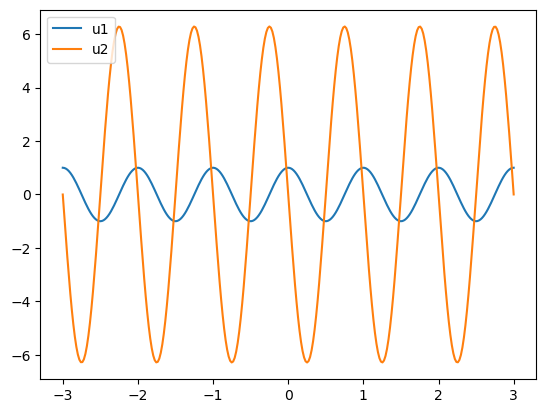

In [35]:
plt.plot(xs, ys[0], label='u1')
plt.plot(xs, ys[1], label='u2')
plt.legend();